## Step 1: Business and Data Understanding

Key Decisions:
 
### 1.     What decisions needs to be made?
Ans: Whether to send out $6.50 catalog to the 250 new customers which are the potential buyers.
 
### 2.     What data is needed to inform those decisions?
Ans: Whether the total profit from these 250 new customers will meet expected value of 10,000. To break it down, we will need to predict ave_sale_amount for each customer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
customer = pd.read_excel("p1-customers.xlsx")
mail = pd.read_excel("p1-mailinglist.xlsx")

In [2]:
customer.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [3]:
#mail.head()

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
Name                          2375 non-null object
Customer_Segment              2375 non-null object
Customer_ID                   2375 non-null int64
Address                       2375 non-null object
City                          2375 non-null object
State                         2375 non-null object
ZIP                           2375 non-null int64
Avg_Sale_Amount               2375 non-null float64
Store_Number                  2375 non-null int64
Responded_to_Last_Catalog     2375 non-null object
Avg_Num_Products_Purchased    2375 non-null int64
#_Years_as_Customer           2375 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 222.7+ KB


In [5]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
Name                          250 non-null object
Customer_Segment              250 non-null object
Customer_ID                   250 non-null int64
Address                       250 non-null object
City                          250 non-null object
State                         250 non-null object
ZIP                           250 non-null int64
Store_Number                  250 non-null int64
Avg_Num_Products_Purchased    250 non-null int64
#_Years_as_Customer           250 non-null float64
Score_No                      250 non-null float64
Score_Yes                     250 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 23.5+ KB


## Step 2: Analysis, Modeling, and Validation
### 1 How and why did you select the predictor variables in your model? 
Ans: The first thing is the target variable. My origional thought is `Responded_to_Last_Catalog`, but it turns out the majority of customers doesn't response (2204 vs 171), these customers actually has a higher `Avg_Sale_Amount` (308 vs 162). Another confusing thing is in `p1-mailinglist.xlsx` : `Score_Yes`. How is this probability calculated? This is important but however beyond this question.

With some commom sense and some data exploration, the predictor variables are Customer_Segment (multi-class) and Avg_Num_Products_Purchased (continuous). 

In [6]:
customer['Responded_to_Last_Catalog'].value_counts()

No     2204
Yes     171
Name: Responded_to_Last_Catalog, dtype: int64

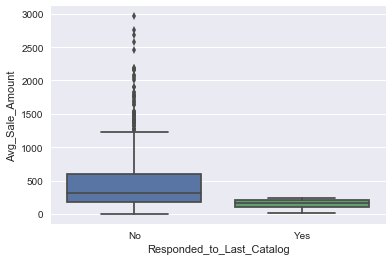

In [7]:
sns.boxplot(x='Responded_to_Last_Catalog', y = "Avg_Sale_Amount",data = customer)

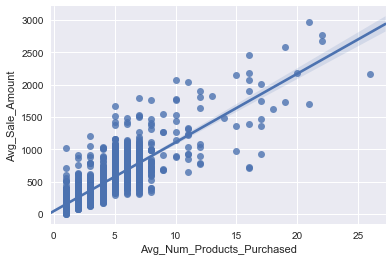

In [8]:
sns.regplot(x='Avg_Num_Products_Purchased', y = "Avg_Sale_Amount",data = customer)

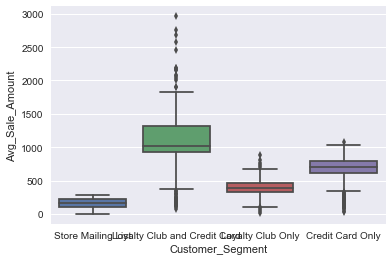

In [9]:
sns.boxplot(x="Customer_Segment", y = "Avg_Sale_Amount",data = customer)

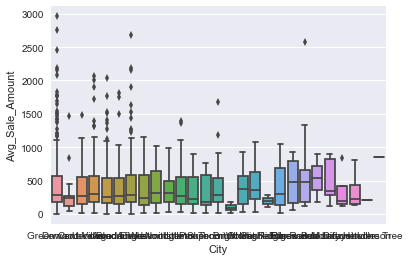

In [10]:
sns.boxplot(x="City", y = "Avg_Sale_Amount",data = customer)

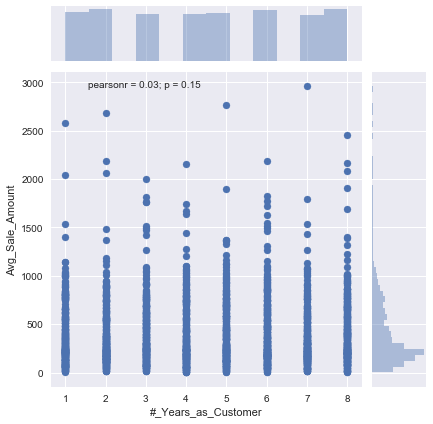

In [11]:
sns.jointplot(x='#_Years_as_Customer', y ='Avg_Sale_Amount', data = customer)

In [20]:
dummies = pd.get_dummies(customer['Customer_Segment'])
X = pd.concat([customer['Avg_Num_Products_Purchased'], dummies], axis=1)
X = X.drop("Credit Card Only",axis=1)  # use "Credit Card Only" as default
y = customer["Avg_Sale_Amount"]
X.head()

,Avg_Num_Products_Purchased,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


In [21]:
import statsmodels.api as sm
#from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        09:35:34   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### 2. Explain why you believe your linear model is a good model.

Ans: The R value is 0.837, indicating a good fit. The p value is almost zero for each variable, indicating good choices of variables.

### 3.What is the best linear regression equation based on the available data?

Ans: y = 303.46 + 66.98 x Avg_Num_Products_Purchased - 149.36 x Loyalty Club Only +
                                              281.84 x Loyalty Club and Credit Card - 245.42 x Store Mailing List 

## Step 3: Presentation/Visualization
### 1.  What is your recommendation? Should the company send the catalog to these 250 customers?


Ans: Yes

### 2.   How did you come up with your recommendation?

Ans: I used the linear model to predict how much individual cusotemer will pay, times its chance to buy, times gross margin rate, minus cost and compare with expected profit. If it exceeds expectation, it is a buy. 

### 3.   What is the expected profit from the new catalog

Ans: According to the following analysis, the average customer will pay \$ 504 with 26% chance. And the total profit after 50% gross margin and 6.50 cost will be \$ 21,986. This exceeds the threshold profit of \$10,000. So I would recommend to do this catalog ad campaign. 

In addition, in the `p1-customers.xlsx`, the customers who don't respond may also contribute to "Avg_Sale_Amount". I don't have a clear explanation at this moment.

In [22]:
from sklearn.linear_model import LinearRegression, Ridge
#model = LinearRegression() # ridicularly larege intercept
model = Ridge()
model.fit(X, y)
model.coef_, model.intercept_

(array([  67.18451485, -148.44601123,  280.28027038, -244.0996339 ]),
 302.0567744490408)

In [23]:
model.score(X,y)

0.83687450635195815

In [25]:
dummies = pd.get_dummies(mail['Customer_Segment'])
X_test = pd.concat([mail['Avg_Num_Products_Purchased'], dummies], axis=1)
X_test = X_test.drop("Credit Card Only", axis = 1)
X_test.head()

,Avg_Num_Products_Purchased,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,3,1,0,0
1,6,0,1,0
2,7,1,0,0
3,2,1,0,0
4,4,1,0,0


In [26]:
y_test = model.predict(X_test)

In [27]:
import numpy as np
print(np.median(y_test))
print(mail["Score_Yes"].median())

503.610319012
0.257990433


In [28]:
sum(mail["Score_Yes"]*y_test*0.5) - 6.5 *250

21985.880836152253

In [29]:
(mail["Score_Yes"]*y_test)[0]  # first record of revenue

108.33783124317979